In [14]:

import numpy as np
import matplotlib.pyplot as plt
import jittor as jt
from jittor.dataset import VarDataset, DataLoader

jt.flags.use_cuda = 1

def read_mnist_images(filename):
    with open(filename, 'rb') as f:

        magic_number = int.from_bytes(f.read(4), byteorder='big')
        num_images = int.from_bytes(f.read(4), byteorder='big')
        num_rows = int.from_bytes(f.read(4), byteorder='big')
        num_cols = int.from_bytes(f.read(4), byteorder='big')

        images = np.fromfile(f, dtype=np.uint8).reshape(num_images, num_rows, num_cols)
        return images

def read_mnist_labels(filename):
    with open(filename, 'rb') as f:

        magic_number = int.from_bytes(f.read(4), byteorder='big')
        num_labels = int.from_bytes(f.read(4), byteorder='big')

        labels = np.fromfile(f, dtype=np.uint8)
        return labels

train_images = read_mnist_images('./mnist/train-images.idx3-ubyte')
train_labels = read_mnist_labels('./mnist/train-labels.idx1-ubyte')
test_images = read_mnist_images('./mnist/t10k-images.idx3-ubyte')
test_labels = read_mnist_labels('./mnist/t10k-labels.idx1-ubyte')



In [15]:
import scipy.ndimage as ndimage

def gaussian_noise(images, std_dev=10):
    '''
    Generate Gaussian white noise.
    Args:
        images: a numpy 2darray (28*28)
        std_dev: standard deviation
    ''' 
    noise = np.random.normal(loc=0, scale=std_dev, size=images.shape)
    noisy_images = images + noise
    noisy_images = np.clip(noisy_images, 0, 255).astype(int)

    return noisy_images

def image_shift(inputs):
    '''
    Shift the image.
    Args:
        inputs: a numpy 2darray (28*28)
    ''' 
    shift1 = np.random.randint(-7, 8)
    shift2 = np.random.randint(-7, 8)
    shifted_image = ndimage.shift(inputs, [shift1,shift2], mode='constant', cval=0.0)

    return shifted_image


In [16]:
# Partition
count = np.zeros(5)
mask = []   
for i in range(train_images.shape[0]):
    if train_labels[i] <= 4:
        if i % 10 == 0:
            mask.append(True)
            count[train_labels[i]] += 1
        else:
            mask.append(False)
    else:
        mask.append(True)
new_train_images = train_images[mask]
new_train_labels = train_labels[mask]

print("new_train_images.shape before augmentation:  ", new_train_images.shape)  # (32423, 28, 28)

# Data Augmentation
aug = np.zeros([1,28,28])
aug_label = np.zeros(1)

for i in range(new_train_images.shape[0]):
    if i%100 == 0:
        
        if aug.shape[0] > 1:
            new_train_images = np.concatenate((new_train_images, aug[1:]), axis=0)
        aug = np.zeros([1,28,28])
        print(i)
    if new_train_labels[i] <= 4:
        
        aug_label = np.append(aug_label, np.repeat(new_train_labels[i],9))
        for j in range(3):
            

            added_image = gaussian_noise(new_train_images[i])
            aug = np.concatenate((aug, np.expand_dims(added_image, axis=0)), axis=0)

            added_image = image_shift(new_train_images[i])
            aug = np.concatenate((aug, np.expand_dims(added_image, axis=0)), axis=0)

            added_image = gaussian_noise(added_image)
            aug = np.concatenate((aug, np.expand_dims(added_image, axis=0)), axis=0)
if aug.shape[0] > 1:
            new_train_images = np.concatenate((new_train_images, aug[1:]), axis=0)
new_train_labels = np.append(new_train_labels, aug_label[1:])

print("new_train_images.shape after augmentation:  ", new_train_images.shape)
print("new_train_labels.shape after augmentation:  ", new_train_labels.shape)


# Add a dimension
new_train_images = np.concatenate([new_train_images[:,np.newaxis,:,:]]*3, axis=1)
test_images = np.concatenate([test_images[:,np.newaxis,:,:]]*3, axis=1)
print(new_train_images.shape)     # (32423, 3, 28, 28)

new_train_images = new_train_images.astype(np.float32)
test_images = test_images.astype(np.float32)

batch_size = 128  

train_images_var = jt.array(new_train_images)
train_labels_var = jt.array(new_train_labels)
train_dataset = VarDataset(train_images_var, train_labels_var)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_images_var = jt.array(test_images)
test_labels_var = jt.array(test_labels)
test_dataset = VarDataset(test_images_var, test_labels_var)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)


new_train_images.shape before augmentation:   (32423, 28, 28)
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400


In [19]:
from jittor import nn, Module

dropout_p = 0.5

class Model(Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv(3, 32, 3, 1)
        self.conv2 = nn.Conv(32, 64, 3, 1)
        self.bn = nn.BatchNorm(64)

        self.pool = nn.Pool(2, 2)
        self.relu = nn.Relu()
        self.dropout = nn.Dropout(dropout_p)
        self.fc1 = nn.Linear(64 * 12 * 12, 256)
        self.fc2 = nn.Linear(256, 10)
    
    def execute(self, x) :
        x = self.conv1(x)
        x = self.relu(x)
        
        x = self.conv2(x)
        x = self.bn(x)
        x = self.relu(x)

        x = self.pool(x)
        x = self.dropout(x)

        x = jt.reshape(x, [x.shape[0], -1])
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

model = Model()
loss_function = nn.CrossEntropyLoss()

learning_rate = 0.01
momentum = 0.9
weight_decay = 1e-5
optimizer = nn.SGD(model.parameters(), learning_rate, momentum, weight_decay)


def train(model, train_loader, loss_function, optimizer, epoch):
    model.train()
    train_losses = list()

    for batch_index, (inputs, targets) in enumerate(train_loader):

        outputs = model(inputs)

        loss = loss_function(outputs, targets)
        optimizer.step(loss)

        train_losses.append(loss)

        if batch_index % 500 == 0:   
            print(f"Train epoch {epoch+1}, batch {batch_index}\tLoss: ", "%.5f" % loss)
    return train_losses

def test(model, val_loader, epoch):
    model.eval()
    total_correct = 0
    total_samples = 0
    for batch_index, (inputs, targets) in enumerate(val_loader):
        outputs = model(inputs)
        prediction = np.argmax(outputs.data, axis=1)
        correct = np.sum(targets.data==prediction)
        batch_size = inputs.shape[0]
        
        total_correct += correct
        total_samples += batch_size
        
    test_acc = total_correct / total_samples
    print (f'Epoch {epoch+1}\tTest acc is {test_acc}\n')              
    return test_acc


epochs = 10
train_losses = []
test_acc = []
for epoch in range(epochs):
    loss = train(model, train_loader, loss_function, optimizer, epoch)
    train_losses += loss
    acc = test(model, test_loader, epoch)
    test_acc.append(acc)

Train epoch 1, batch 0	Loss:  2.34798
Epoch 1	Test acc is 0.9749

Train epoch 2, batch 0	Loss:  0.05042
Epoch 2	Test acc is 0.978

Train epoch 3, batch 0	Loss:  0.03889
Epoch 3	Test acc is 0.9796

Train epoch 4, batch 0	Loss:  0.02664
Epoch 4	Test acc is 0.9853

Train epoch 5, batch 0	Loss:  0.06628
Epoch 5	Test acc is 0.9836

Train epoch 6, batch 0	Loss:  0.01062
Epoch 6	Test acc is 0.9838

Train epoch 7, batch 0	Loss:  0.02914
Epoch 7	Test acc is 0.9853

Train epoch 8, batch 0	Loss:  0.00091
Epoch 8	Test acc is 0.9858

Train epoch 9, batch 0	Loss:  0.00490
Epoch 9	Test acc is 0.9848

Train epoch 10, batch 0	Loss:  0.01094
Epoch 10	Test acc is 0.9861



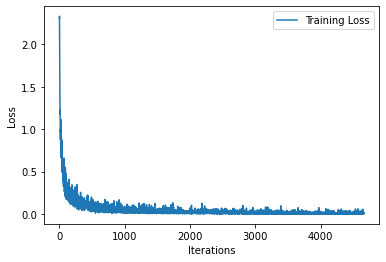

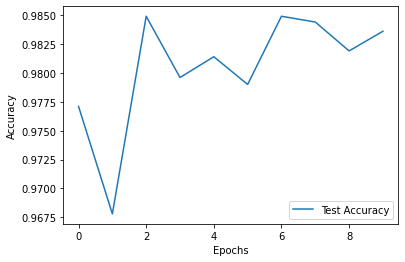

In [18]:
plt.plot(train_losses, label="Training Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.savefig(f"loss_batch{batch_size}_epoch{epochs}_lr{learning_rate}_dp{dropout_p}_m{momentum}_wd{weight_decay}.jpg", dpi=800)
plt.show()

plt.plot(test_acc, label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig(f"acc_batch{batch_size}_epoch{epochs}_lr{learning_rate}_dp{dropout_p}_m{momentum}_wd{weight_decay}.jpg", dpi=800)
plt.show()